<a href="https://colab.research.google.com/github/Umerfarooq122/Support-Vector-machine-for-bank-loan-approval/blob/main/SVM_for_loan_approval_from_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machines Vs Other Machine Learning Algorithm:**

In this stduy we will explore Support Vector Machines. Previously we have worked with Decision tree and Random forest (Ensemble Trees) and and found out that random forest performs better and genelarize better than a single decision tree. Here we will put SVM to a test against random forest. We will start our study with introducing ourseleves to SVM and a theoretical comparison with trees. Once we have an idea about SVM then we will explore the data set that we will use to elaborate SVM in detail. After that we will compare and analyze the results with our previous work and some relevant articles. We will end our study with a conclusion and some future works that could be done to improve further.

## **Introduction:**

Support Vector Machines (SVM) and ensemble trees are two powerful techniques in the field of machine learning, both widely used for classification and regression tasks. While they belong to distinct families of algorithms, each with its unique characteristics and advantages, they share the common goal of efficiently learning from data to make predictions.

Encouragement Developed in the 1990s by Vapnik and Cortes, vector machines are a type of supervised learning techniques used in regression and classification applications [1]. When there are more characteristics than samples and high-dimensional spaces, SVMs perform very well. In order to maximize the margin between the classes, they locate the ideal hyperplane in the feature space that optimally divides the various classes. SVMs are renowned for their resilience to overfitting and their capacity to manage complicated decision boundaries, particularly when dealing with high-dimensional data [2].

In contrast to Support Vector Machines (SVMs), there are several alternative machine learning methods available, each with specific features and uses. Decision trees, neural networks, k-nearest neighbors (KNN), and ensemble techniques like Random Forests and Gradient Boosting Machines, for example, provide several ways to solve classification and regression issues.

Using majority class labels within each zone as a basis for prediction, decision trees divide the feature space into regions. KNN, on the other hand, assigns labels according to the class of the closest neighbors in the feature space and depends on the similarity between examples. Neural networks are incredibly flexible and scalable systems made of linked layers of nodes that develop hierarchical representations of input. They are inspired by the organization of the human brain. When combining predictions from several weak learners, ensemble techniques like as Random Forests and Gradient Boosting Machines perform better than individual models in many cases [3].

A number of considerations are taken into account while choosing between SVMs and other machine learning methods, such as the dataset's characteristics, computational effectiveness, the model's interpretability, and the particular needs of the task at hand. SVMs perform well in some situations, however alternative algorithms might be able to accomplish the goals and complexities of the task more effectively. Thus, choosing the best strategy for a particular machine learning problem requires an awareness of the advantages and disadvantages of each method.

## **Exploratory Data Analysis:**

In this section we will explore the data that we will be using to understand the working and evaluate the performance of Support vector machines. We will also try to fix the problems that comes along in the data set in this section.The same data set will be used to run other ML algorithms to have a fair comparison with SVM. Let's load the required libraries and the data set to start exploring and understanding it.

### **Loading The Libraries And Dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,auc, f1_score,roc_auc_score,roc_curve, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Decision-Tree-vs-Random-Forest-in-Python/main/loadstatustrain.csv")

Let's explore the first few rows of the data set to check if everything loaded into our environment they way it was suppose to be

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

So far everything seems right. We can see that we have columns mostly with categorical response which has to be coded and set up in the right data type. Let's check the data type of each column or feature along with any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see that that columns like `Gender`,`Married`, `Education` e.t.c contains a categorical response but the data data type is an object so we need to fix that by encoding the reponse and fixing the data type. Similarly, we also see that features like `Gender`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History` has missing values which needs to be fixed before we start modeling.

### **Missing Values Imputation:**

Since we do not have a lot of missing values so we can impute them right here in data exploration rather than waiting for the data preparation session. We have imputed the missing categorical responses with the mode of the same column while the continous respose by the mean of their respective columns

In [6]:
df['Gender'].replace([np.nan], df['Gender'].mode()[0], inplace=True)
df['Married'].replace([np.nan], df['Married'].mode()[0], inplace=True)
df['Dependents'].replace([np.nan], df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].replace([np.nan], df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].replace([np.nan], df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].replace([np.nan], df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].replace([np.nan], df['Loan_Amount_Term'].mean(), inplace=True)

Now we have imputed the missing values let's confirm that everything feature has been imputed properly

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

This confirms that none of the features has any missing values anymore.

### **Fixing the Data type:**

In this section we will fix the data type of features mentioned before. All the features with categorical response will be change to data type 'category' and encoded

In [8]:
df['Gender']= df['Gender'].astype('category')
df['Married']=df['Married'].astype('category')
df['Education']=df['Education'].astype('category')
df['Dependents']=df['Dependents'].astype('category')
df['Self_Employed']=df['Self_Employed'].astype('category')
df['Property_Area']=df['Property_Area'].astype('category')
df['Loan_Status']=df['Loan_Status'].astype('category')
df['Credit_History']=df['Credit_History'].astype('category')

Now that the data type is fixed we can go ahead and code them.

In [9]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

The categorical responses has been coded properly we can do final check by displaying the first five rows of the data set.

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 30.0+ KB


### **Descriptive Summary Statistics:**

In this section we will check out the descriptive summary of the continous varaibles in the data set before we go ahead and visualize the target and feature columns

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000
std,6109.041673,2926.248369,84.037468,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


### **Target Column:**

Now that our data set is ready to be used to trained the support vector machines and other models let's take a step back and explore the features and trarget column of the data set. In this section we will plot our target column and since our reponse is categorical so we can make a bar plot.

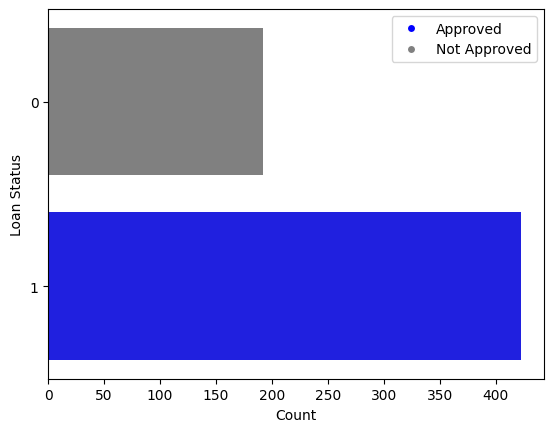

In [13]:
palette = {'1':'blue','0':'gray'}
ax = sns.countplot(df['Loan_Status'],
              palette=palette)

ax.legend().set_visible(False)

legend_labels = {'1': 'Approved', '0': 'Not Approved'}


dummy_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[label], label=legend_labels[label]) for label in legend_labels]

# Add the legend with custom labels
ax.legend(handles=dummy_handles)
plt.ylabel('Loan Status')
plt.yticks()
plt.xlabel('Count')
plt.show()


We can see that there is a class imbalance in the target variable which is `Loan_Status`. Which might skew the performance a little bit for SVM. SVMs do not inherently handle class imbalance. SVMs aim to find the decision boundary that maximizes the margin between classes, which may not necessarily be optimal in the presence of imbalanced classes. Previously we did use random forest and trees on this data set. Random forests can effectively learn from imbalanced datasets without the need for explicit class weighting or sampling techniques.

We will try to run the the SVM model on our original data and see how it performs and if the results are not that great then we will opt of resampling. Let' check out our feature columns

### **Feature Columns:**

In this section we will look into the distribution of feature columns that we will use to predict the traget column that was discussed previously

In [14]:
features_binary = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Credit_History', 'Loan_Status']

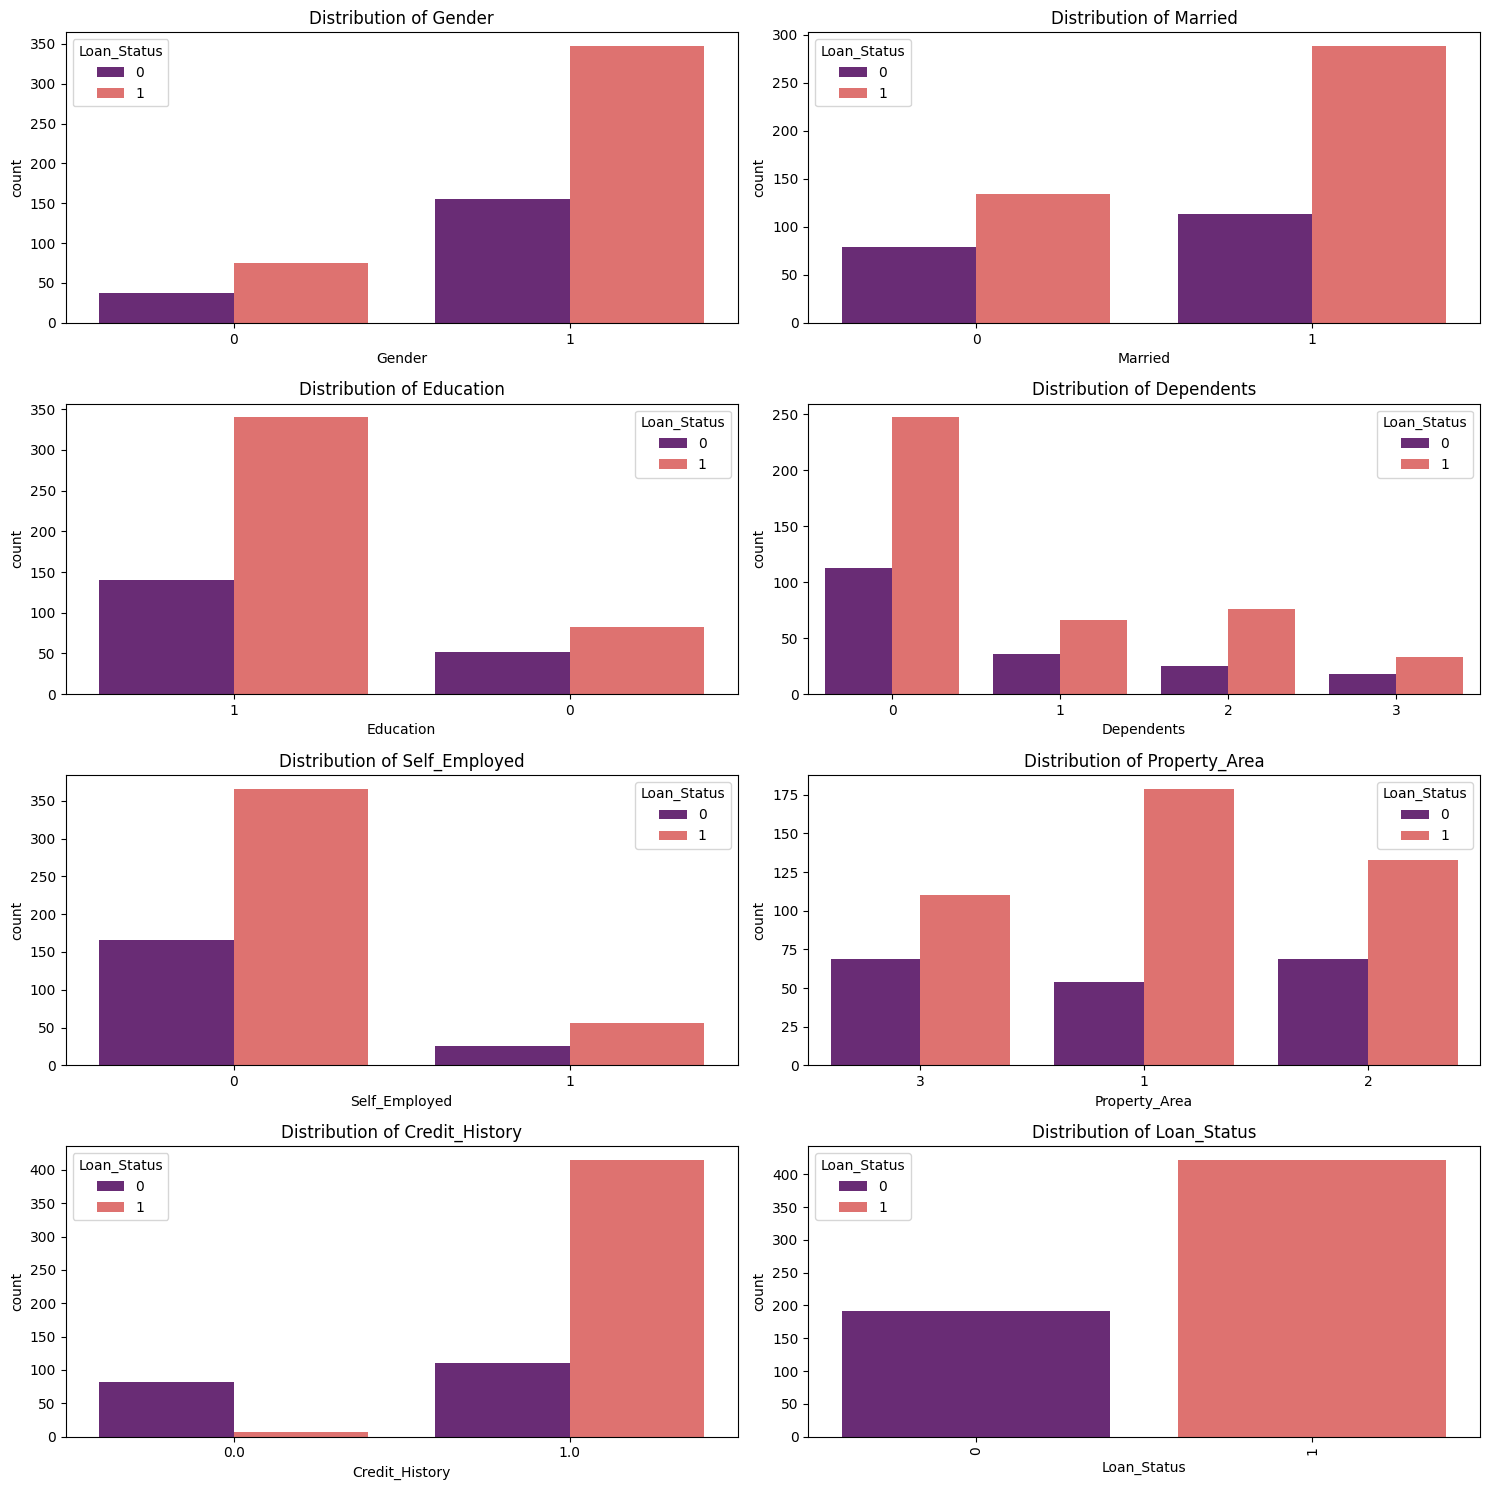

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)


for i, feature in enumerate(features_binary):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Loan_Status', data=df, ax=axes[row, col], palette='magma')
    axes[row, col].set_title(f'Distribution of {feature}')
    plt.xticks(rotation = 90)

plt.tight_layout()

plt.show()

We can see an imbalance in the features too and it looks like an ideal situation for resampling the data set but like I said before we will feed the data as is to the algorithm first and see how it performs. Let's go ahead and check out the continous varaibles and there distrbutions.

In [16]:
feat = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

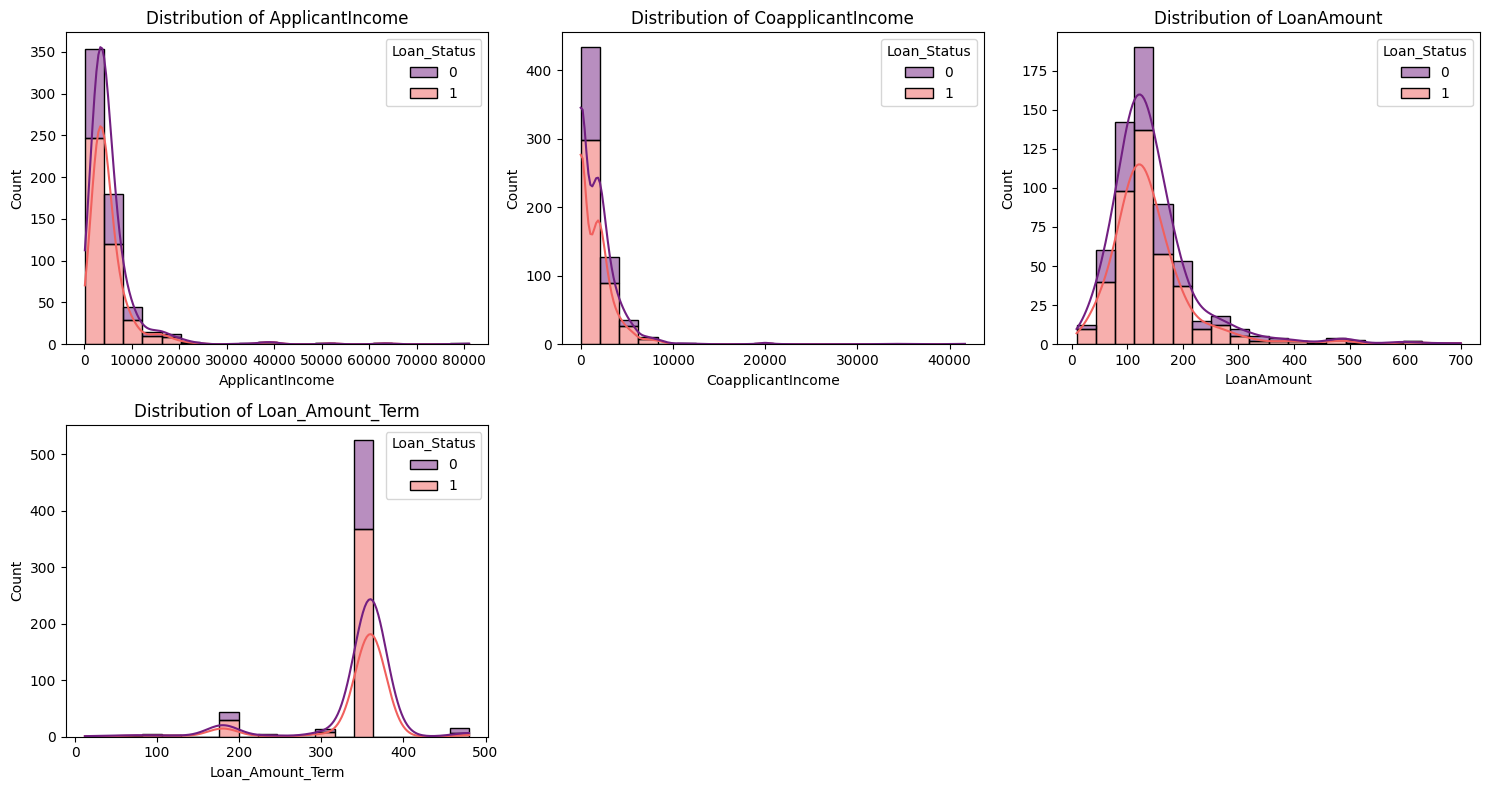

In [17]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(feat, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Loan_Status', multiple='stack', palette='magma')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Again we can see that features like `ApplicantIncome`,`CoapplicantIncome`, has a bit skewed distribtions but SVMs are usually insensitive to those. `LoanAmount` shows a little bit of normal distrbution

## **Training Support Vector machines:**

In this section we will train our SVM algorithm. For that we will have to kick out unnecessary columns from our data set such as `Loan_ID` and we will also remove `Loan_Status` from our features since it is the target column and will store everything in X as pandas data frame. Similarly, we store our target column in Y. After that we will split the data for testing and training.

### **Initial Model:**

#### **Splitting The Data:**

In [18]:
X=df.drop(['Loan_Status','Loan_ID'], axis=1).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
#X=df[['ApplicantIncome','Credit_History']].values
#Y=df['Loan_Status'].values
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


#### **Training The Model:**

In this section we will train our SVM model. We will use X_train as training features and Y_train as the response or target variable. Initally, we will linear kernel with C=.1 (Heavily penalized) to start off. Later on we will try to further tune the model for optimum hyperparameters.

In [20]:
SVM = svm.SVC(kernel = "linear", C = .1, probability=True)
SVM.fit(X_train, Y_train)
dt_pred_train = SVM.predict(X_train)

#### **Evaluating The Performance:**

In this Section we will evaluate the performance of our initial model to see how it performed on training and testing data.

##### **Model Metrics:**

In [21]:
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train))
print('Training Set Evaluation Accuracy-Score=>',accuracy_score(Y_train,dt_pred_train))
print('Training Set Evaluation Recall-Score=>',recall_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 0.875
Training Set Evaluation Accuracy-Score=> 0.8044806517311609
Training Set Evaluation Recall-Score=> 0.9824561403508771


In [22]:
dt_pred_test = SVM.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test))
print('Testing Set Evaluation Accuracy-Score=>',accuracy_score(Y_test,dt_pred_test))
print('Testing Set Evaluation Recall-Score=>',recall_score(Y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.8648648648648648
Testing Set Evaluation Accuracy-Score=> 0.7967479674796748
Testing Set Evaluation Recall-Score=> 1.0


The reason why we checked the matrics for both training and testing is that to see if there is overfit or not. If the metrics ar very good for training set and the model fails to perform closer to that on testing set means that the algorithm is overfitting and not genelarizing well. We saw that occuring in Decision Tree but Random Forest try to overcome that. Here in SVM we see that metrics of testing and training are very close which validates no overfitting and well generalized model. Lets check out the confusin metrics

##### **Confusion Matrix:**

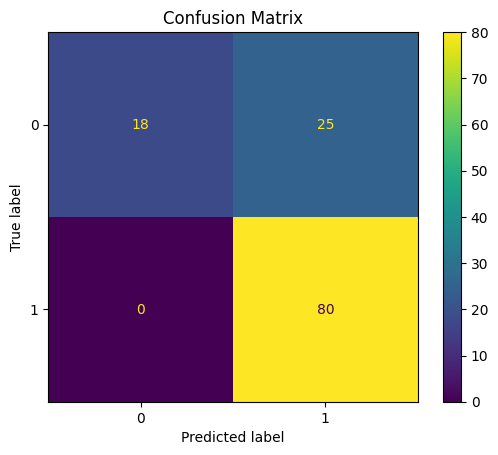

In [23]:
cm = confusion_matrix(Y_test, dt_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

The effect of class imbalance is visible here and we can see that all the true labels that are 1 (Approved) are correctly classified while when true labels are 0 we have a lot of misclassfication. Even though our model metrics look good but there is a higher chance that over model will classify most of the applicant as approved.

##### **ROC Curve:**

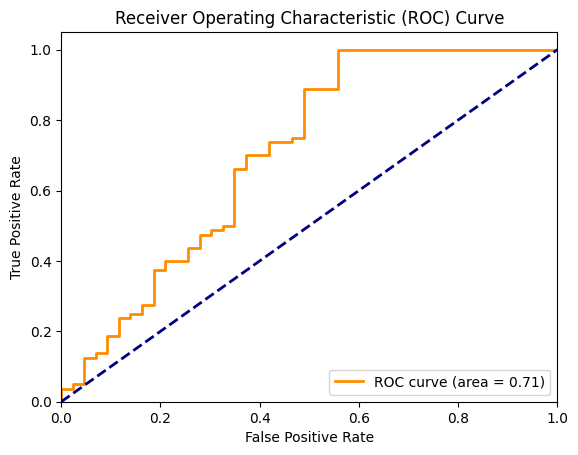

In [24]:
y_pred_proba = SVM.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AUC of ROC equals .71 which is not a great achievement. AUC value of 0.71 indicates that the model has moderate discriminatory power

##### **Important Featues:**

Let's check out the features that were considered important by our SVM model. There is no direct way like we had for other models like random forest, KNN and regressions to check the important features but we find it out using permutation importance.

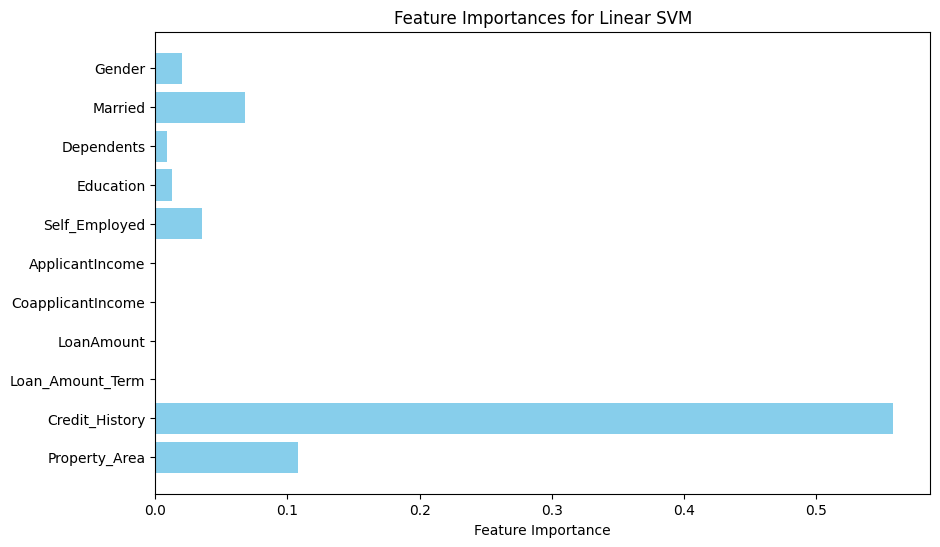

In [25]:
feature_names = df.drop(['Loan_Status','Loan_ID'], axis=1).columns
feature_importances = abs(SVM.coef_)[0]/5
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, align='center', color='skyblue')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

`Credit_History` gets most of the importance among the features for classification by SVM.

### **Resampled Model:**

In this section we will resample and we will use `SMOTE` which is Synthetic Minority Over-sampling Technique.It is an oversampling technique used to balance the class distribution of a dataset by creating synthetic minority class samples.

#### **Resampling The Training Data:**

In [26]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

##### **Model:**

In [27]:
SVM_re = svm.SVC(kernel = "linear", C = .1, probability=True)
SVM_re.fit(X_train_resampled, y_train_resampled)
dt_pred_train_re = SVM_re.predict(X_train_resampled)

##### **Model Metrics:**

In [28]:
print('Training Set Evaluation F1-Score=>',f1_score(y_train_resampled,dt_pred_train_re))
print('Training Set Evaluation Accuracy-Score=>',accuracy_score(y_train_resampled,dt_pred_train_re))
print('Training Set Evaluation Recall-Score=>',recall_score(y_train_resampled,dt_pred_train_re))

Training Set Evaluation F1-Score=> 0.7240437158469946
Training Set Evaluation Accuracy-Score=> 0.7046783625730995
Training Set Evaluation Recall-Score=> 0.7748538011695907


In [29]:
dt_pred_test_re = SVM_re.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test_re))
print('Testing Set Evaluation Accuracy-Score=>',accuracy_score(Y_test,dt_pred_test_re))
print('Testing Set Evaluation Recall-Score=>',recall_score(Y_test,dt_pred_test_re))

Testing Set Evaluation F1-Score=> 0.8402366863905325
Testing Set Evaluation Accuracy-Score=> 0.7804878048780488
Testing Set Evaluation Recall-Score=> 0.8875


As you have seen here, our training prediction scores were lower, than the testing prediction scores. This is okay. Yes, it sounds awkward, but it’s actually fine. In this particular cases our SVM again generalizes well

##### **Confusion Matrix:**

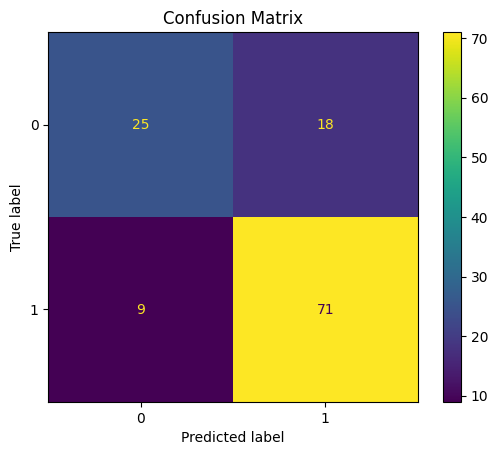

In [30]:
cm = confusion_matrix(Y_test, dt_pred_test_re)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Previously with original data set we observed that there were absolutely no true labels that are 1 were misclassified and all the misclassified were 0's where in this case we have a better classification result for 0's.

##### **ROC Curve:**

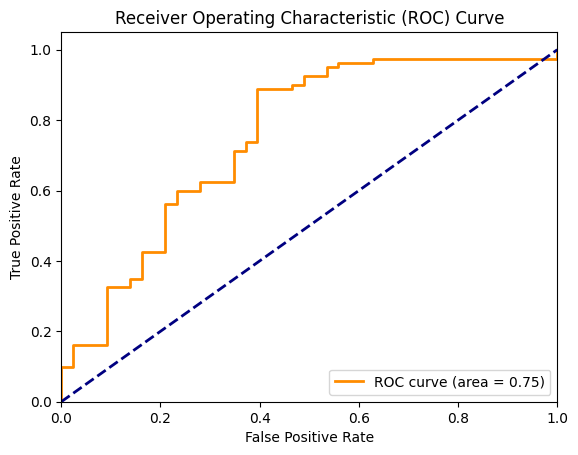

In [31]:
y_pred_proba_re = SVM_re.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_re)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **Fine Tuned Model:**

In this section we will fine tune our SVM using `GridSearchCV` which performs cross validation over a grid of values for the hyperparameters and picks out the nest parameters based on certain criteria. Below is the code for tuning our SVM but I have comment it out because of the time (more than an hour) it consumes.

In [32]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

#grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)


#grid.fit(X_train, Y_train)

In [33]:

 # print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

In [34]:
#grid_predictions = grid.predict(X_test)

# print classification report
#print(accuracy_score(Y_test, grid_predictions))

After runnung the code we got the best parameter as:
* kernel = 'linear'
* C = .1
* gamma = default

## **Comparison With Other Models:**

In this section we will run a bunch of different machine learning model on the same data set and see how they perform in comparison to our SVM model. In the code cell I will try to run each algorithm and save its metrics in a dataframe and then we will evaluate that at the end

In [35]:
metrics_df = pd.DataFrame(columns=['F1-Score','Precision', 'Recall', 'Accuracy'])

#### **Original Dataset:**

We will apply other machine learning models like Naive Bayes, Logistic Regression, Decision Tree, Random Forest, KNN and XGBoost to our original data set and see how they perform against SVM. The metrics that we will be looking at are F1-Score, Recall, Precision and Accuracy. We will keep F1-Score as deciding parameter because F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when there is an uneven class distribution. It ranges from 0 to 1, with higher values indicating better performance. We will not tune every single model as it can lengthen the process so we let the algorithm to auto tune.

First we have set up a dictionary of all the model and then we will use for loop to loop over the dictionary and run every model.

In [36]:
models={'Gaussian NB':GaussianNB(),
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(kernel = 'linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost" : XGBClassifier()
}

In [37]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred)
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(Y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(Y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred)
    model_train_f1 = f1_score(Y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(Y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(Y_train, y_train_pred,average='weighted')

    metrics_df.loc[list(models.keys())[i]] = [model_test_f1,model_test_precision, model_test_recall,model_test_accuracy]

Now we have ran all the models mentioned above and the results are stored in the data frame `metric_df`. Let's check out the performance of all the data.

In [38]:
metrics_df.sort_values(by = "F1-Score", ascending=False)

,F1-Score,Precision,Recall,Accuracy
Logisitic Regression,0.772419,0.830969,0.796748,0.796748
Gaussian NB,0.754213,0.807175,0.780488,0.780488
Random Forest,0.746990,0.790645,0.772358,0.772358
Support Vector Machine,0.746108,0.835879,0.780488,0.780488
XGBoost,0.700802,0.703969,0.715447,0.715447
Decision Tree,0.677945,0.675262,0.682927,0.682927
K-Nearest Neighbors,0.520425,0.500741,0.585366,0.585366


We can see that based on F1-Score surprisingly Logistic regression outperformed all other models because the data is easily separable linearly (that is why linear kernel outperformed RBF in SVM). KNN did not do a good job and there could be two main reasons, firstly, the class imbalance that is present and secondly the class overlaps. In the next section we will use resampled data which will confirm what we are trying to say. Support vector machines with linear kernel performs midrange amongst other model. It does not fall behind that much from top performing algorithms in all the metrics i.e. 2nd best based on Accuracy and Recall, 1st based on Precision and 4rth based on F1-Score

### **Resampled Dataset:**

In this section we will use `X_trained_resampled` and `y_trained_resampled` that we came up with in previous sections using `SMOTE`. We also have the dictionary that contains the models and we will use that. Let's create a new data frame that will hold the performance metrics of each model.

In [39]:
metrics_df_re = pd.DataFrame(columns=['F1-Score','Precision', 'Recall', 'Accuracy'])

In [40]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_resampled,y_train_resampled.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred)
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(Y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(Y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    model_train_f1 = f1_score(y_train_resampled, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train_resampled, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train_resampled, y_train_pred,average='weighted')

    metrics_df_re.loc[list(models.keys())[i]] = [model_test_f1,model_test_precision, model_test_recall,model_test_accuracy]

In [41]:
metrics_df_re.sort_values(by="F1-Score", ascending=False)

,F1-Score,Precision,Recall,Accuracy
Gaussian NB,0.765062,0.813669,0.788618,0.788618
Support Vector Machine,0.756098,0.756098,0.756098,0.756098
Random Forest,0.754213,0.807175,0.780488,0.780488
Logisitic Regression,0.742084,0.741426,0.747967,0.747967
XGBoost,0.737591,0.740658,0.747967,0.747967
Decision Tree,0.734783,0.733475,0.739837,0.739837
K-Nearest Neighbors,0.516781,0.522355,0.512195,0.512195


After resampling we see that the performance for every algorithm improved apart from logistic regression will fell almsot 3%/ SVM performance improved comparitively and moved to the second spot. WE can observe the improvemnt in F1-Score by 1.5%.

## **Comparison With Decision Tree:**

In this Section we will specifically with Decision Tree. Even we did use an auto model for Decision Tree and it did not perform very well on both original and resampled data set. Over here we will take a deeper look at Decision Tree and will try to improve the performance. Along every step we will compare with our SVM model.

### **Initial Model:**

Let;s create an initial model and let's use criteria as entropy to start with.

In [42]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)



DecisionTreeClassifier(criterion='entropy', random_state=42)

#### **Model Performance Metrics:**

In [43]:
# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))
print('Training Set Evaluation Accuracy-Score=>',accuracy_score(Y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0
Training Set Evaluation Accuracy-Score=> 1.0


In [44]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))
print('Testing Set Evaluation Accuracy-Score=>',accuracy_score(Y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8045977011494252
Testing Set Evaluation Accuracy-Score=> 0.7235772357723578


We can clearly see that the Decision Tree is over fitting because our testing accuracy is much lower (more than 25%) than training accuracy and similary the F1-Score is also signifcantly low. Changing tree depth, number of leaves and criteria might change that. In comparison with SVM that we ran earlier the training and testing accuracies and F1-Scores were really close which suggests a better fit that will generalize well as compared to a normal decision tree that we just ran. Here is our confsuion matrix.

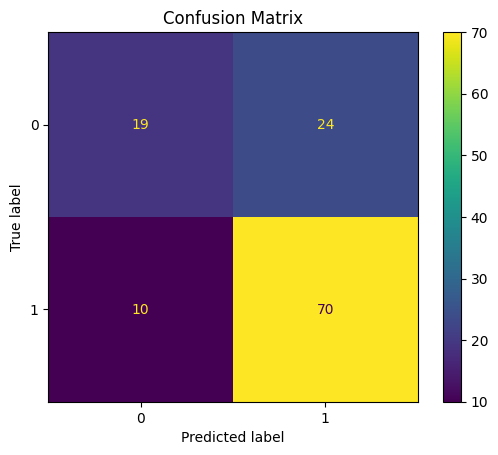

In [45]:
cm = confusion_matrix(Y_test, rfc_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### **Tuned Decision Tree:**

Let's tune the model using `GridSearchCV` which performs cross validation over a grid of values of hyper paramters and picks out the best one. Below we have set up our parameters grid.

In [46]:
param_gridt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
grid_searcht = GridSearchCV(estimator=rfc, param_grid=param_gridt, cv=5)
grid_searcht.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [48]:
print("Best Parameters:", grid_searcht.best_params_)
best_dt_classifier = grid_searcht.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


We can see that the best parameters were the ones that are mentioned above. Let's check out the performance of the fined tuned model based on original data set.

#### **Model Performance Metrics:**

In [49]:
test_score = best_dt_classifier.score(X_test, Y_test)
y_pred_tt = best_dt_classifier.predict(X_test)
f1 = f1_score(y_pred_tt, Y_test)
print("Test Accuracy:", test_score)
print("F1-Score:", f1)

Test Accuracy: 0.7886178861788617
F1-Score: 0.8586956521739131


We can see a lot of improvement after fine tuning the model but the SVM e trained earlier still outperforms it. SVM had an F1-Score of .86 and accuracy of .79 which is still higher than what the best Decision tree can provide.

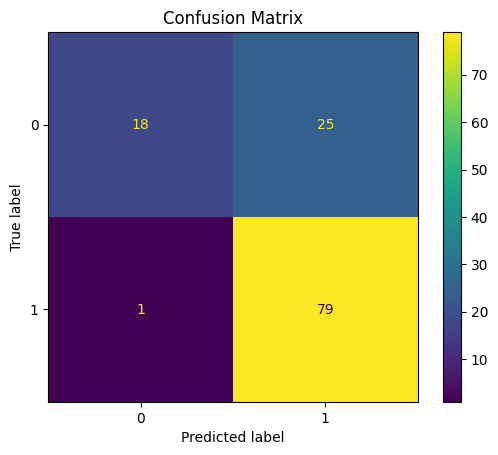

In [50]:
cm = confusion_matrix(Y_test, y_pred_tt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### **Resampled Tree:**



In [51]:
grid_searchtr = GridSearchCV(estimator=rfc, param_grid=param_gridt, cv=5)
grid_searchtr.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [52]:
print("Best Parameters:", grid_searchtr.best_params_)
best_dtr_classifier = grid_searchtr.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


We can see that with resampling the best estimators have changed

#### **Model Performance metrics:**

In [53]:
test_score = best_dtr_classifier.score(X_test, Y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.7560975609756098


The accuracy went even below the previous model which means that synthetic creation of data is effecting the decision tree badly, Let's look at our confusion matrix

In [54]:
y_pred_ttr = best_dtr_classifier.predict(X_test)

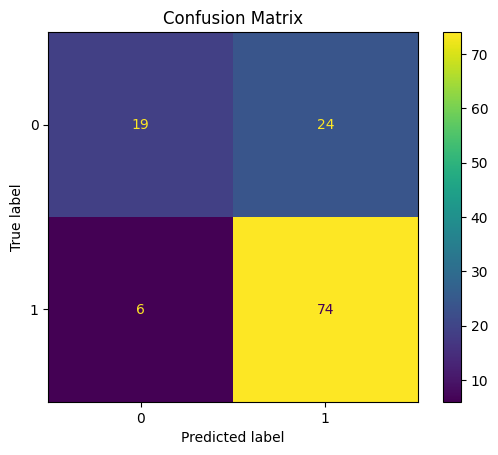

In [55]:
cm = confusion_matrix(Y_test, y_pred_ttr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### **Important features:**

In this section we will look at the important feature according to both Decision Tree and SVM

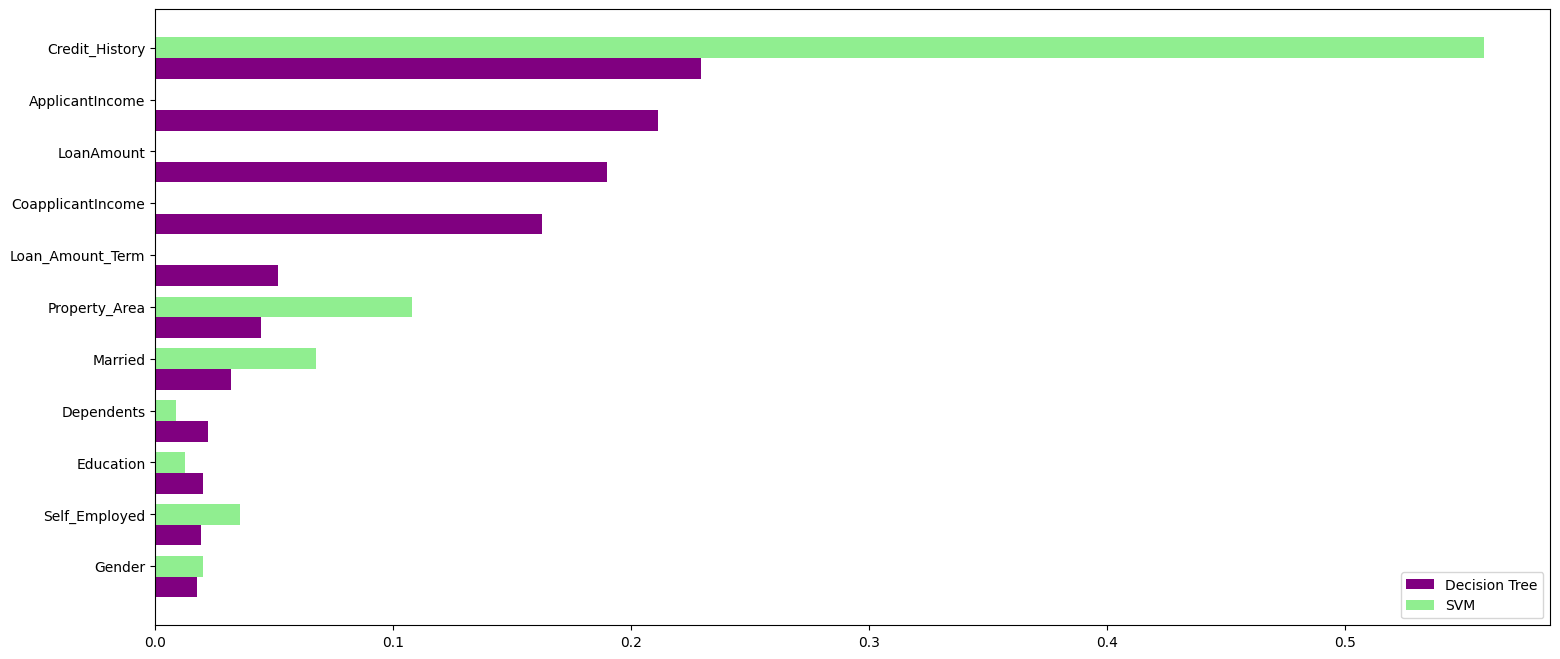

In [56]:

feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'SVM':feature_importances
},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Decision Tree')
dt_feature=ax.barh(index+0.4,feature_importance['SVM'],0.4,color='lightgreen',label='SVM')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

We can see that the most important feature for both of the algorithm is `Credit_History` but the only difference is that Decision also uses other features like `ApplicantIncome`, `LoanAmount`, `CoapplicantIncome` and `Loan_Amount_Term` while SVM mostly gives important `Credit_History` as a decision boundary for classifying.

## **Comparison with Relevant Articles:**

Mehmet et. el [3] explored SVM with multiple kernels such linear, polynomial, RBG and Sigmoid on bank loan approval using an imbalance data set. The highlight of their work was that the data set that they have used had more indicators for algorithm to learn from it and return a high accuracy model. They were able to achieve an accuracy scor eof 97% which is surprisingly high, the sigmoid kernel performed the worst comparitively and the accuracy score was around 83%. Even with high accuracy there overall F1-Score still was not that impressive and they could achieve a score of .85 with best tuned model. Similarly they also tried other ML algorithms like Decision Tree, Random Forest and Logistic Regression but none these models could match the performance of SVM with polynomial kernel according to them. In Contrast our SVM gave us the best results with a linear kernel and I did try other kernels which are not included in the study but there performance was way below linear kernel and the reason could be that our data set might have data point which can be linearly separatable while in their case the decision might be a little complex than linear, not too complex for RBF or Sigmoid but just enough to produce good results using polynomial kernel.



In an another study, Eweoya et. el [4] used SVM for a problem closed to what we did in our study. They used SVM to detect Fraud prediction in loan default. In their study, they discuss the impact of credit or loan defaults on banks and economies, highlighting the importance of effective loan scrutiny methods. It presents findings from a study using SVM in kernel mode, emphasizing its high accuracy (about 83.3 %) in identifying fraudulent transactions. Additionally, it contrasts SVM with other methodologies include Naïve Bayes, decision trees, and neural networks, noting its superior performance in the specific dataset used. Their article was a bit reluctant in displaying all the details of model for example which kernel was used? what was allowed error rate (C)? what was the accuracy or F1-Score or AUC of ROC of other models but they had a good emphasis on SVM. In contrast with our study we did find SVM in the top two three best performing algorithm while Naive Bayes was always in top 2 the reason for that could be the size of the data set and Imbalance since Naive bayes are ideally good with small size data set with Imbalance.



Ndayisenga [5] in his doctoral desertation, emphasizes the importance of effective credit analysis to mitigate the risk of loan defaults, which can lead to capital and interest losses for financial institutions. With the advent of technology, big data, and advancements in machine learning and artificial intelligence, the study suggests leveraging these tools for loan prediction, customer segmentation, and product recommendation. Focusing on predicting loan defaults, the study uses data from the Bank of Kigali in Rwanda. It outlines the data preprocessing steps, including cleaning, handling missing values, and addressing imbalanced data and outliers, to prepare the dataset for various machine learning techniques. These techniques, such as Logistic Regression, Random Forest, Support Vector Machine, and others, are applied to identify the best-performing model for predicting loan defaults based on different variables. In his case XGBClassifier outperformed other alogrithms mainly because of extremely large data set (58k obervation and 29 features) while in our case XGBoost remained in the middle performance wise. He was able to achieve F1-score of .8 while in our case it stayed around .74. We could improve the performance too by fine tuning it but in this we did not attempt to do that. Another reason for XGBoost to perform better on his data set was high non linear relationship amongst the feature and target.

## **Conclusion:**

In this comprehensive study on SVM we used the data set for bank loan aprroval and created a model to classify the applicant as approved and not aprroved. The study dealt with a binary classification model. The data was obtain from an online repository  which had around 600 observations and 11 features. The study introduced the readers to the data set by exploring both features and the target colum. After exploration the data was prepared for the modleing by imputing the missing values and fixing the data type to the right format. Once the data was ready an attempt was made to creat a SVM classification model and the results were satisfactory but one class (no approved) was getting msiclassified a lot because of the class imbalance. Resampling was done using SMOTE to deal with class imbalance which resulted inot improving AUC of ROC from .71 to .75 while other model metrics were pretty much unchanged. The study then put the SVM against other classification models such as Naive Bayes, Logistic Regression, XGBoost, Random Forest, KNN and Decision Tree. Naive Bayes outperformed all other algorithms based on F1-Score after resampling mainly because of the smaller size of the data set and came 2nd on the original data set. SVM did the 2nd best after resampling based on F1-Score while stayed in the middle on original data set. The difference between SVM and top performing model was not that huge on both occasions. A fine tuned decision tree was also trained to compare against our SVM but it could not match the performance of SVM and a clear overfit was observed with testing metrics were more than 20% below the training metrics but the importance that given to features by Decision Tree made more sense since it gave importance to more features while SVM relied heavily on `Credit_History` feature which could be problamatic according to some bank mainly because they want to use or gain information from more predictors rather than relying on one or two. The study also took a dip at some relevant articles and an usuall phenomenon was observed, most of the authors were using accuracy as a parameter knowing that they were using an imbalance data set.

## **Reference:**

[1] Ahmad, A., Safi, O., Malebary, S., Alesawi, S. and Alkayal, E., 2021. Decision tree ensembles to predict coronavirus disease 2019 infection: a comparative study. Complexity, 2021, pp.1-8.

https://www.hindawi.com/journals/complexity/2021/5550344/

[2] Guhathakurata, S., Kundu, S., Chakraborty, A. and Banerjee, J.S., 2021. A novel approach to predict COVID-19 using support vector machine. In Data Science for COVID-19 (pp. 351-364). Academic Press.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8137961/

[3] Akça, M.F. and Sevli, O., 2022. Predicting acceptance of the bank loan offers by using support vector machines. International Advanced Researches and Engineering Journal, 6(2), pp.142-147.

https://dergipark.org.tr/en/pub/iarej/article/1058724

[4] Eweoya, I.O., Adebiyi, A.A., Azeta, A.A. and Amosu, O., 2019, August. Fraud prediction in loan default using support vector machine. In Journal of Physics: Conference Series (Vol. 1299, No. 1, p. 012039). IOP Publishing.

https://iopscience.iop.org/article/10.1088/1742-6596/1299/1/012039/pdf

[5] Ndayisenga, T., 2021. Bank loan approval prediction using machine learning techniques (Doctoral dissertation).

https://dr.ur.ac.rw/bitstream/handle/123456789/1437/THEONESTE%20NDAYISENGA.pdf?sequence=1&isAllowed=y